In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kendalltau

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import os
os.makedirs('Supplemental_Figures', exist_ok=True)

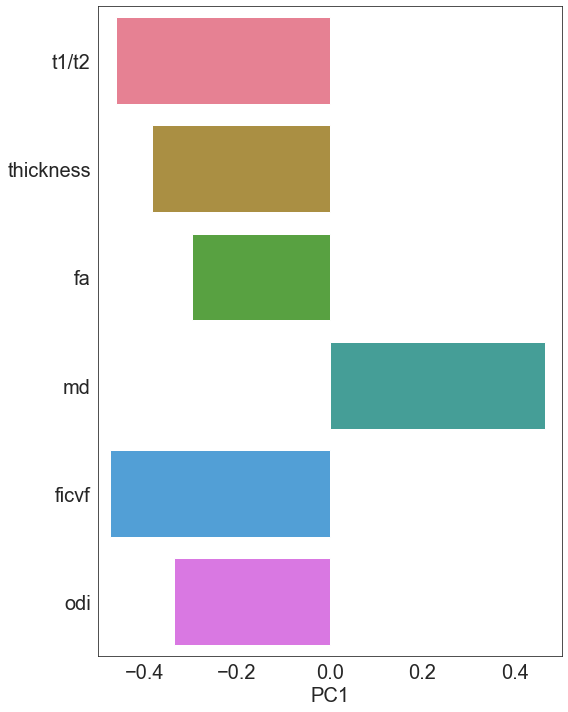

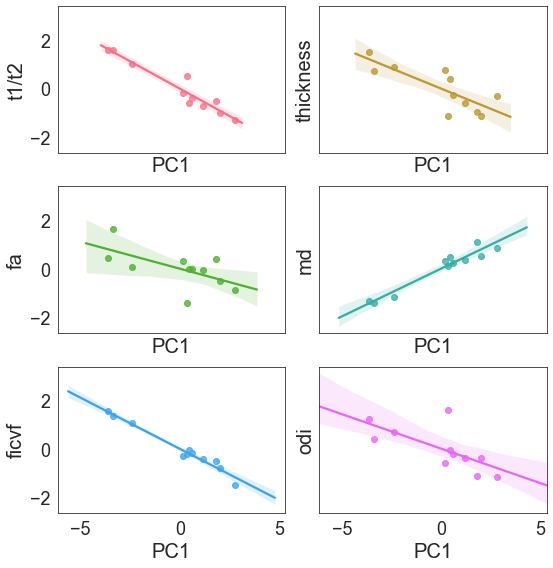

In [3]:
# Supplemental Figure 2
sns.set_style(style='white')

# load regional metric data
regional_data = pd.read_csv('../data/processed_imaging/regional-multimodal-metrics-term-data-clean-zscore.csv')
mean_regional_data = regional_data.groupby('metric').mean().loc[:,'A1C':'VLPFC']
mean_regional_data = mean_regional_data.pivot_table(columns='metric')
mean_regional_data = mean_regional_data.rename(columns={'myelin':'t1/t2'})

eigen_vector_data = pd.read_csv('../results/PCA/mean-regional-principal-components-eigenvectors.csv')
eigen_vector_data['metric'] = eigen_vector_data['metric'].map({'myelin':'t1/t2'}).fillna(eigen_vector_data['metric'])

# load PC data
pc_data = pd.read_csv('../results/PCA/mean-regional-principal-components.csv')

# plot eigenvectors
fig, ax = plt.subplots(1,1, figsize=(8,10))
sns.barplot(y='metric', x='PC1', data=eigen_vector_data, orient='h',
            order=['t1/t2', 'thickness', 'fa', 'md', 'ficvf', 'odi'],
            palette='husl', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('')
ax.set_xlabel('PC1', fontsize=20)

plt.xlim(-0.5,0.5)

plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S2a.png')

# show correlation between metrics and PC coordinates
palette = sns.color_palette(palette='husl', n_colors=6)

fig, (ax1, ax2, ax3) = plt.subplots(3,2, figsize=(8,8), sharex=True, sharey=True)

sns.regplot(pc_data['PC1'], mean_regional_data['t1/t2'].values, color=palette[0], ax=ax1[0])
sns.regplot(pc_data['PC1'], mean_regional_data['thickness'].values, color=palette[1], ax=ax1[1])
sns.regplot(pc_data['PC1'], mean_regional_data['fa'].values, color=palette[2], ax=ax2[0])
sns.regplot(pc_data['PC1'], mean_regional_data['md'].values, color=palette[3], ax=ax2[1])
sns.regplot(pc_data['PC1'], mean_regional_data['ficvf'].values, color=palette[4], ax=ax3[0])
sns.regplot(pc_data['PC1'], mean_regional_data['odi'].values, color=palette[5], ax=ax3[1])


for ax in [ax1,ax2,ax3]:
    ax[0].tick_params(axis='both', which='major', labelsize=18)
    ax[1].tick_params(axis='both', which='major', labelsize=18)

    ax[0].set_xlabel('PC1', fontsize=20)
    ax[1].set_xlabel('PC1', fontsize=20)

ax1[0].set_ylabel('t1/t2', fontsize=20)
ax1[1].set_ylabel('thickness', fontsize=20)
ax2[0].set_ylabel('fa', fontsize=20)
ax2[1].set_ylabel('md', fontsize=20)
ax3[0].set_ylabel('ficvf', fontsize=20)
ax3[1].set_ylabel('odi', fontsize=20)

plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S2b.png')

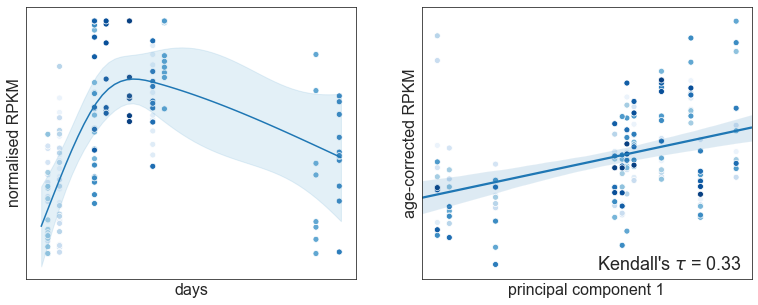

In [4]:
# Figure S3
# load precalculated normalised RPKM and model fits for visualisation
rpkm_data = pd.read_csv('Supplemental_Figures/Figure_S3_rpkm_data.csv')
model_fit = pd.read_csv('Supplemental_Figures/Figure_S3_rpkm_model_fit.csv')

# plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))
sns.scatterplot('age', 'log2_rpkm', data=rpkm_data, hue='sample', palette='Blues', legend=None, ax=ax1)
ax1.plot(model_fit['age'], model_fit['fit'])
ax1.fill_between(model_fit['age'], model_fit['lower'], model_fit['upper'], color='#77b5d9', alpha=.2)

sns.scatterplot('pc1', 'mean_nl_residuals', data=rpkm_data, hue='sample', palette='Blues', legend=None, ax=ax2)
sns.regplot('pc1', 'mean_nl_residuals', data=rpkm_data, scatter=False,ax=ax2)

for ax in (ax1, ax2):
    ax.set_yticks([])
    ax.set_xticks([])
    
ax1.set_ylabel('normalised RPKM', fontsize=16)
ax1.set_xlabel('days', fontsize=16)
ax2.set_ylabel('age-corrected RPKM', fontsize=16)
ax2.set_xlabel('principal component 1', fontsize=16)


kt = kendalltau(rpkm_data['pc1'], rpkm_data['mean_nl_residuals'])[0]
ax2.text(-.2, 3.38, r"Kendall's $\tau$ = {:.2f}".format(kt), fontsize=18)

plt.savefig('Supplemental_Figures/Figure_S3.png')

timing
study
neurons


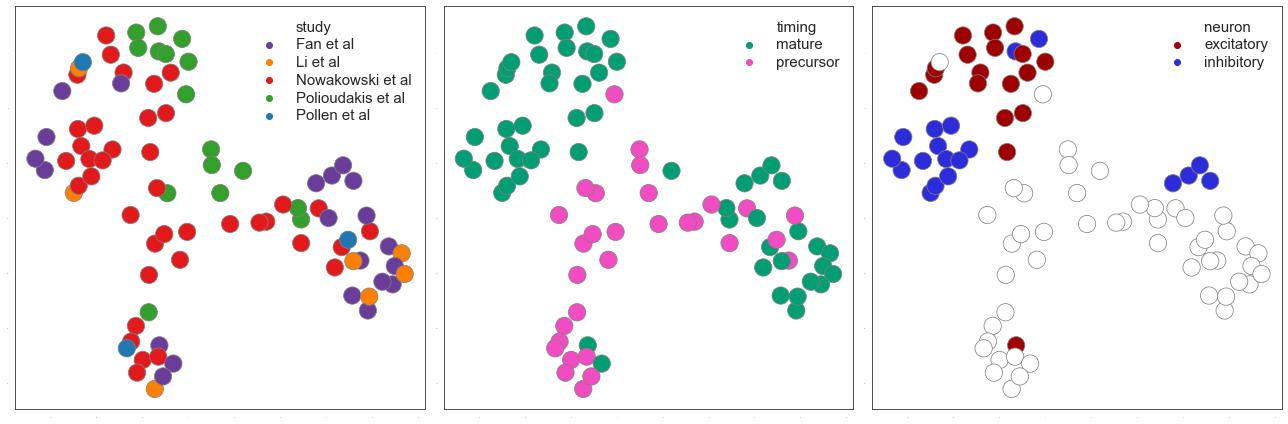

In [5]:
# Figure S5
# load UMAP embeddings
embedded_data = pd.read_csv('../data/umap/cell-specific-embedding.csv')

# change names to something better
cell_name_dict = {'neuron_excitatory':'excitatory neuron',
                  'neuron_inhibitory':'inhibitory neuron',
                  'radial_glia':'radial glia',
                  'neuron':'neuron: unspecified'}
embedded_data['class'] = embedded_data['class'].map(cell_name_dict).fillna(embedded_data['class'])

# plot coloured by cell timing
print('timing')
timing_colours = ['#029e73','#f14cc1']
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))

sns.scatterplot('umap1', 'umap2', hue='timing', data=embedded_data, s=300, palette=timing_colours, edgecolor='grey', ax=ax2)
ax2.legend(fontsize=15,frameon=False, labelspacing=0.25)
ax2.set_xlabel('', fontsize=25)
ax2.set_ylabel('', fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=0)

# plot coloured by study
print('study')
cell_study_dict = {'fan':'Fan et al',
                  'psychENCODE':'Li et al',
                  'kriegstein':'Nowakowski et al',
                  'pollen':'Pollen et al',
                  'geschwind':'Polioudakis et al'}
embedded_data['study'] = embedded_data['study'].map(cell_study_dict).fillna(embedded_data['study'])

#fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.scatterplot('umap1', 'umap2', hue='study', data=embedded_data, s=300, palette='Paired_r', edgecolor='grey', ax=ax1)
ax1.legend(fontsize=15,frameon=False, labelspacing=0.25)
ax1.set_xlabel('', fontsize=20)
ax1.set_ylabel('', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=0)

# plot coloured by neuronal cell type
print('neurons')
labels = np.array(['neuron']*len(embedded_data), dtype='<U16')
labels[embedded_data['class']=='inhibitory neuron'] = 'inhibitory'
labels[embedded_data['class']=='excitatory neuron'] = 'excitatory'

c0 = '#ffffff'
c1 = '#9e0000'
c2 = '#2c2cdb'

cell_colours = [c0,c1,c2]
#fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.scatterplot(embedded_data['umap1'], embedded_data['umap2'], hue=labels,s=300, palette=cell_colours, edgecolor='grey', ax=ax3)
ax3.legend(fontsize=15,frameon=False, labelspacing=0.25)
ax3.set_xlabel('', fontsize=20)
ax3.set_ylabel('', fontsize=20)
ax3.tick_params(axis='both', which='major', labelsize=0)

plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S5.png')


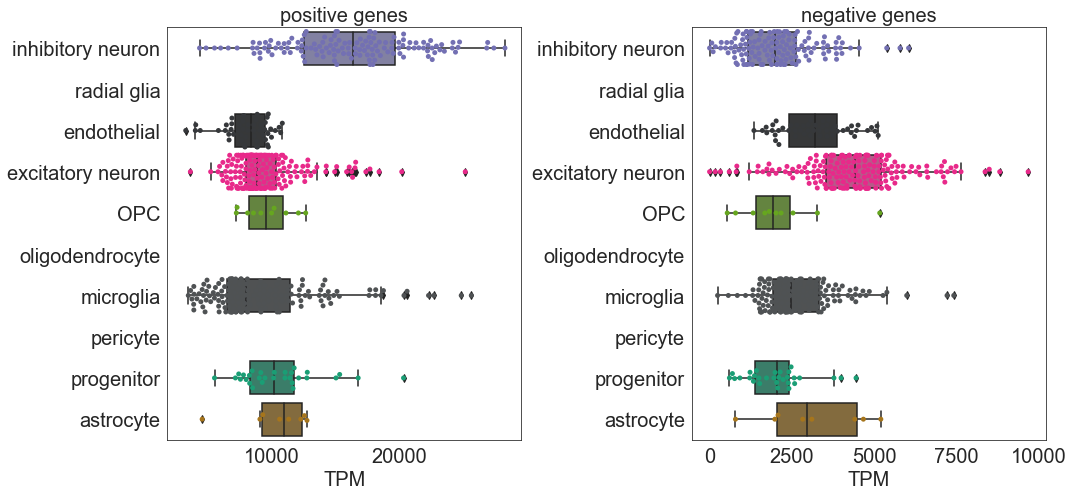

In [6]:
#Figure S6
sig_genes = pd.read_csv('../results/gene_correlations/PCA_correlations-KendallTau-PC-significant_genes-p0.05.csv')
scRNA_cell_data = pd.read_csv('../data/validation/scRNA-TPM-data-scRNA-filtered.csv')

# get genes in each cell listed as PC1 positive or negative
positive_gene_cell_data = scRNA_cell_data.loc[scRNA_cell_data['symbol'].isin(list(sig_genes[sig_genes['PC1_tau']>0]['symbol'])),:]
positive_gene_cell_data = positive_gene_cell_data.reset_index().drop('index', axis='columns')
positive_gene_cell_data['class'] = positive_gene_cell_data['class'].map(cell_name_dict).fillna(positive_gene_cell_data['class'])

negative_gene_cell_data = scRNA_cell_data.loc[scRNA_cell_data['symbol'].isin(list(sig_genes[sig_genes['PC1_tau']<0]['symbol'])),:]
negative_gene_cell_data = negative_gene_cell_data.reset_index().drop('index', axis='columns')
negative_gene_cell_data['class'] = negative_gene_cell_data['class'].map(cell_name_dict).fillna(negative_gene_cell_data['class'])

# sum TPM is each cell for genes identified as +ve and -ve
pos = positive_gene_cell_data.groupby(['new_region','cell','class']).sum().reset_index()
neg = negative_gene_cell_data.groupby(['new_region','cell','class']).sum().reset_index()

# plot
col_order = ['inhibitory neuron', 'radial glia', 'endothelial', 'excitatory neuron', 'OPC', 'oligodendrocyte', 'microglia', 'pericyte', 'progenitor', 'astrocyte']
order = ['astrocyte', 'progenitor', 'excitatory neuron', 'endothelial', 'inhibitory neuron', 'radial glia', 'microglia', 'OPC', 'oligodendrocyte', 'pericyte']

cell_colours = sns.color_palette([(0.65, 0.46, 0.11),
                                  (0.10, 0.62, 0.46),
                                  (0.91, 0.16, 0.54),
                                  (0.21, 0.22, 0.23),
                                  (0.45, 0.44, 0.70),
                                  (0.85, 0.37, 0.01),
                                  (0.31, 0.32, 0.33),
                                  (0.40, 0.65, 0.12),
                                  (0.90, 0.67, 0.01),
                                  (0.40, 0.30, 0.21)])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7), sharey=False, sharex=False)

sns.swarmplot(y='class', x='TPM', hue='class', order=col_order, hue_order=order, palette=cell_colours, data=pos,
            dodge=False,  orient='h', ax=ax1)
sns.boxplot(y='class', x='TPM', hue='class', order=col_order, hue_order=order, palette=cell_colours, data=pos,
            dodge=False,  orient='h', ax=ax1, saturation=.5)
sns.swarmplot(y='class', x='TPM', hue='class', order=col_order, hue_order=order, palette=cell_colours, data=neg,
            dodge=False,  orient='h', ax=ax2)
sns.boxplot(y='class', x='TPM', hue='class', order=col_order, hue_order=order, palette=cell_colours, data=neg,
            dodge=False,  orient='h', ax=ax2, saturation=.5)

for ax in [ax1,ax2]:
    ax.legend().set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylabel('')
    ax.set_xlabel('TPM', fontsize=20)
ax1.set_title('positive genes', fontsize=20)
ax2.set_title('negative genes', fontsize=20)

plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S6.png')


using modelled gene trajectories to demonstrate shift in developmental maturity across regions
significant_genes


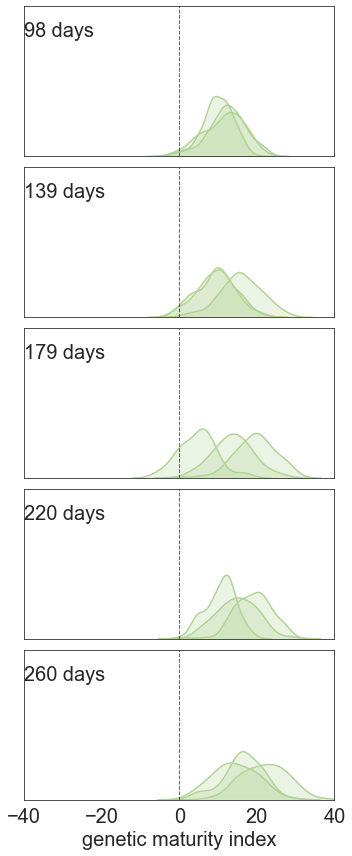

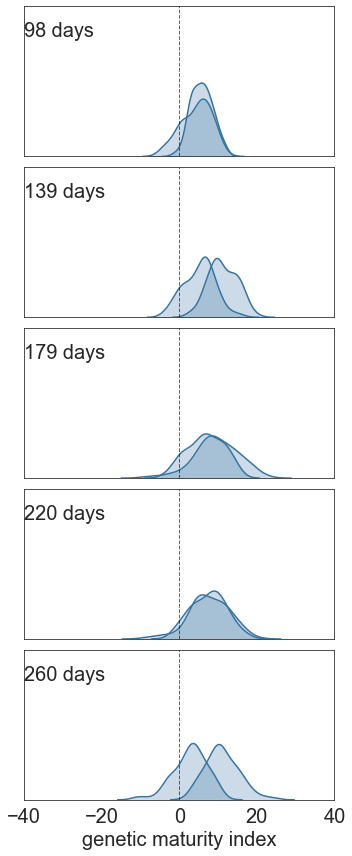

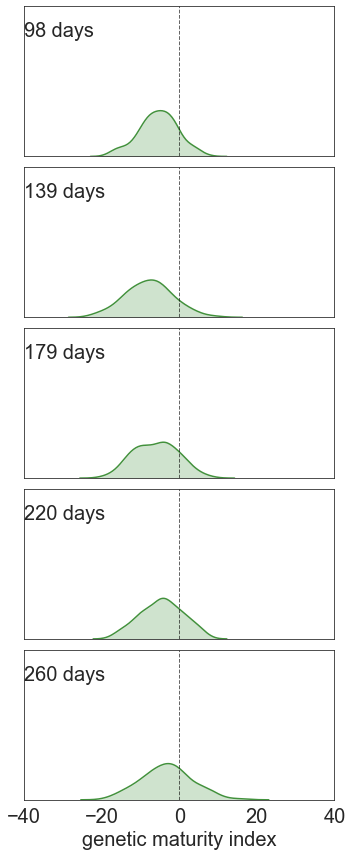

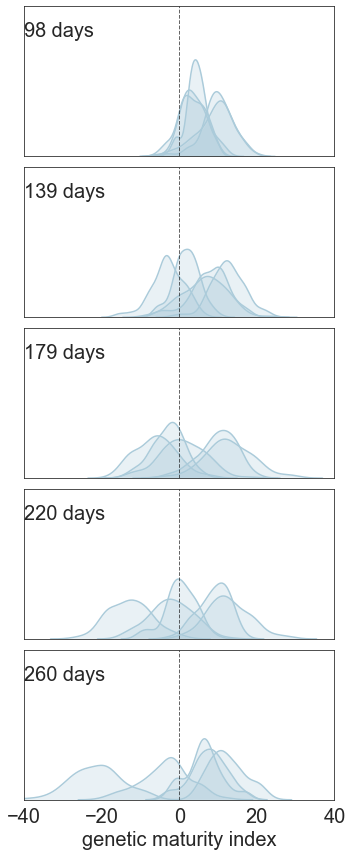

In [7]:
ss = StandardScaler()
kr = SVR(kernel='linear', C=10)
pipe = Pipeline([('scaler',ss), ('regressor', kr)])

def pivot_bulk_data(data, values='log2_rpkm'):
    # select data
    selected_data = data.loc[:,['symbol', 'sample', 'region', 'age', values]]
    # pivot
    table_data = selected_data.pivot_table(index=['sample', 'region', 'age'], columns='symbol', values=values)
    table_data = table_data.reset_index()

    return table_data

def plot_distributions(data, ages, regions, n_boot=10, ax=None, ymax=1.5, x_limits=[-40,40]):
    if ax is None:
        fig,ax=plt.subplots(len(ages),1, figsize=(10,5))

    for n, ag in enumerate(np.unique(data['age'][ages])):
        age_df = data.loc[data['age']==ag,:]

        for r in regions:
            sns.distplot(age_df.loc[age_df['region']==r, np.arange(n_boot)].values[0], ax=ax[n],
                         hist=False, kde_kws={'shade':True}, norm_hist=True,
                         color=age_df.loc[age_df['region']==r, 'color'].values[0])

        ax[n].text(x_limits[0], .8*ymax, '%0.0f days' % ag, fontsize=20)

    for ax_ in ax:
        ax_.set_xlim(x_limits[0], x_limits[1])
        ax_.set_ylim(0,ymax)
        ax_.set_yticklabels('')
        ax_.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('genetic maturity index', fontsize=20)


# LOAD DATA ##################################################################################################
# load sample, sex, RIN corrected data
bulk_data = pd.read_csv('../results/gene_models/gene-data-corrected.csv')
significant_genes = pd.read_csv('../results/gene_correlations/PCA_correlations-KendallTau-PC-significant_genes-p0.05.csv')['symbol']

# load trajectory data
trajectories = pd.read_csv('../results/gene_models/prenatal-gene-trajectories-by-region.csv')

# pivot table
model_data = pivot_bulk_data(bulk_data, values='residuals')  # sample data, all genes
model_trajectory_data = pivot_bulk_data(trajectories, values='fit')

# select significant genes
significant_model_data = pd.concat((model_data[['sample','region','age']], model_data[significant_genes]), axis=1)
significant_model_trajectory_data = pd.concat((model_trajectory_data[['sample','region','age']], model_trajectory_data[significant_genes]), axis=1)

 # number of bootstraps
n_boot = 100

### TRAJECTORY DATA #############################################################################################
print('')
print('using modelled gene trajectories to demonstrate shift in developmental maturity across regions')

training_datasets = [significant_model_data]
testing_datasets = [significant_model_trajectory_data]

datanames = ['significant_genes']

xlims = [[-40,40]]
ymaxes = [.25, .8]

for d, dataset in enumerate(training_datasets):
    print(datanames[d])
    mean_data = dataset.groupby(['sample', 'age']).mean().reset_index()
    # extract gene columns
    mean_data_genes = mean_data.drop(['sample','age'], axis='columns')
    # extract sample info columns
    mean_data_info = mean_data.loc[:,['sample','age']]

    # training data
    x_train = mean_data_genes.copy()
    y_train = mean_data_info['age']
    mean_y = np.mean(y_train)

    # region data
    x_test = testing_datasets[d].drop(['sample','age','region'], axis='columns')

    # bootstrap
    idx = np.arange(len(x_test.T))
    boot_predictions = np.zeros((len(x_test),n_boot))

    for b in np.arange(n_boot):
        # bootstrap sample
        bs_idx = np.random.choice(idx, size=len(idx), replace=True)
        # train model using the rest of the *mean* cortical data
        pipe.fit(x_train.iloc[:,bs_idx], y_train)

        # predict age based on regional expression
        boot_predictions[:,b]=pipe.predict(x_test.iloc[:,bs_idx])

    age_differences = np.subtract(boot_predictions, testing_datasets[d]['age'].values.reshape(-1,1))
    age_differences = pd.concat((testing_datasets[d].loc[:,['region', 'age']], pd.DataFrame(age_differences)),1)

# plot
# group regions
region_dict = {'A1C':3,
              'S1':3,
              'M1':3,
              'MFC':2,
              'STC':2,
              'V1':4,
              'DLPFC':1,
              'VLPFC':1,
              'OFC':1,
              'IPC':1,
              'ITC':1}
age_differences['cluster'] = age_differences['region'].map(region_dict)

# choose colours
palette_dict={1:'#abcbda',
              2:'#3673a0',
              3:'#b1d394',
              4:'#42913c'}
age_differences['color'] = age_differences['cluster'].map(palette_dict)

# choice ages to visualise
age_choice = [5,16,27,38,49]

# plots
fig1, axs1 = plt.subplots(5,1,figsize=(5,12), sharex=True, sharey=True)
plot_distributions(age_differences, age_choice, ['A1C', 'M1', 'S1'], n_boot=n_boot, ax=axs1, ymax=ymaxes[d], x_limits=xlims[d])
for ax in axs1:
    ax.axvline(x=0, lw=1, linestyle='--', c='black', alpha=0.6)
plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S7a.png')

fig2, axs2 = plt.subplots(5,1,figsize=(5,12), sharex=True, sharey=True)
plot_distributions(age_differences, age_choice, ['MFC','STC'], n_boot=n_boot, ax=axs2, ymax=ymaxes[d], x_limits=xlims[d])
for ax in axs2:
    ax.axvline(x=0, lw=1, linestyle='--', c='black', alpha=0.6)
plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S7b.png')

fig0, axs0 = plt.subplots(5,1,figsize=(5,12), sharex=True, sharey=True)
plot_distributions(age_differences, age_choice, ['V1'], n_boot=n_boot, ax=axs0, ymax=ymaxes[d], x_limits=xlims[d])
for ax in axs0:
    ax.axvline(x=0, lw=1, linestyle='--', c='black', alpha=0.6)
plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S7c.png')

fig3, axs3 = plt.subplots(5,1,figsize=(5,12), sharex=True, sharey=True)
plot_distributions(age_differences, age_choice, ['DLPFC', 'VLPFC', 'OFC', 'IPC', 'ITC'], n_boot=n_boot, ax=axs3, ymax=ymaxes[d], x_limits=xlims[d])
for ax in axs3:
    ax.axvline(x=0, lw=1, linestyle='--', c='black', alpha=0.6)
plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S7d.png')


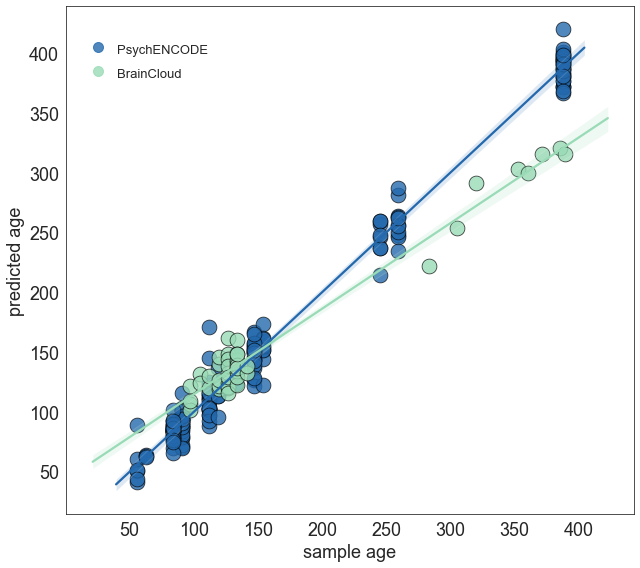

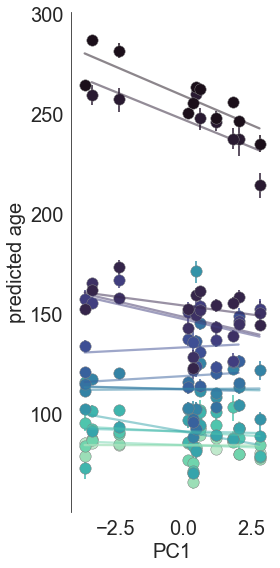

In [9]:
# Figure S8
model_predictions = pd.read_csv('../results/age_predictions/age-prediction-all_genes.csv')
model_correlations = pd.read_csv('../results/age_predictions/PC1-correlations-all_genes.csv')
model_fits = pd.read_csv('../results/age_predictions/PC1-correlations-all_genes-model-fits.csv')
validations_predictions = pd.read_csv('../results/age_predictions/age-prediction-BrainCloud-all_genes.csv')

# SCATTERPLOT OF AGE PREDICTIONS IN TWO COHORTS
fig, ax = plt.subplots(1,1, figsize=(9,8))
sns.scatterplot('age', 'mean_prediction', data=model_predictions, color='#2469ad', s=220, edgecolor='black', alpha=.8, ax=ax)
sns.regplot('age', 'mean_prediction', data=model_predictions, color='#2469ad', scatter=False, units='region', ax=ax)
sns.scatterplot('age', 'mean_prediction', data=validations_predictions, color='#99dbb6', s=220, edgecolor='black', alpha=.8)
sns.regplot('age', 'mean_prediction', data=validations_predictions, color='#99dbb6', scatter=False, ax=ax)

ax.tick_params('both', labelsize=18)
ax.set_ylabel('predicted age', fontsize=18)
ax.set_xlabel('sample age', fontsize=18)

ax.text(40,400,'PsychENCODE', fontsize=13)
ax.text(40,380,'BrainCloud', fontsize=13)

plt.scatter([25],[405], color='#2469ad', s=100, alpha=.8)
plt.scatter([25],[385], color='#99dbb6', s=100, alpha=.8)
plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S8a.png')

# AGE PREDICTIONS BY REGION AND SAMPLE
# select out prenatal samples
model_predictions = model_predictions[model_predictions.prenatal==1]
model_correlations = model_correlations[model_correlations['prenatal']==1]

# sort by age
sorted_samples = list(model_predictions.groupby(by='sample').mean().reset_index().sort_values(by='age')['sample'])
model_predictions = model_predictions.sort_values(by=['age', 'sample','region'])

# plot
g = sns.lmplot('PC', 'mean_prediction', data=model_predictions, hue='sample',
               palette='mako_r', truncate=True,
               line_kws={'alpha':0.5}, scatter_kws={'s':130, 'edgecolor':'grey', 'linewidths':.5, 'alpha':1},
               legend=False, ci=None, height=8, aspect=.5)

colors = sns.color_palette('mako_r', n_colors=len(sorted_samples))

# add error bars
for n, i in enumerate(sorted_samples):
    dat = model_predictions[model_predictions['sample']==i]
    err = dat['mean_prediction']-dat['lower_prediction'], dat['upper_prediction']-dat['mean_prediction']
    g.axes[0][0].errorbar(dat['PC'], dat['mean_prediction'], err, fmt='none', color=colors[n], zorder=0)

g.axes[0][0].tick_params('both', labelsize=20)
g.axes[0][0].set_ylabel('predicted age', fontsize=20)
g.axes[0][0].set_xlabel('PC1', fontsize=20)
sns.despine(bottom=True)

plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S8b.png')

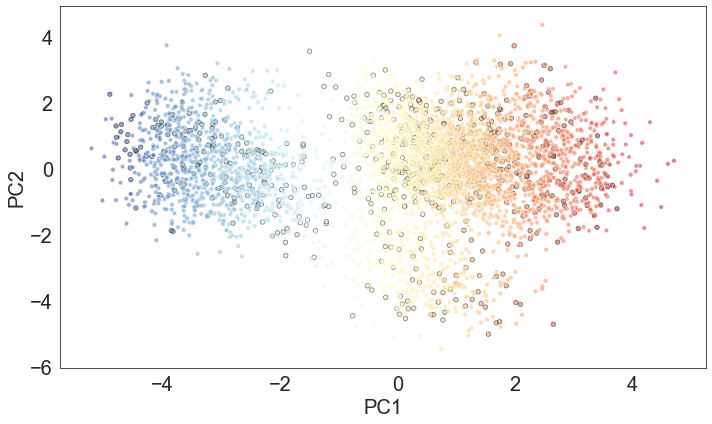

In [27]:
# Figure S9
preterm_xy_coordinates = pd.read_csv('../results/PCA/subject-specific-regional-principal-components-preterm.csv')
term_xy_coordinates = pd.read_csv('../results/PCA/subject-specific-regional-principal-components-term.csv')
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.scatterplot('PC1','PC2',hue='PC1', data=preterm_xy_coordinates, s=20, edgecolor='black',alpha=.5,
                legend=False, palette='RdYlBu_r', ax=ax)
sns.scatterplot('PC1','PC2',hue='PC1', data=term_xy_coordinates, s=20, alpha=.5,
                legend=False, palette='RdYlBu_r', ax=ax)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)

plt.tight_layout()
plt.savefig('Supplemental_Figures/Figure_S9.png')

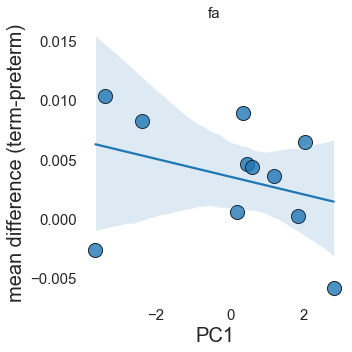

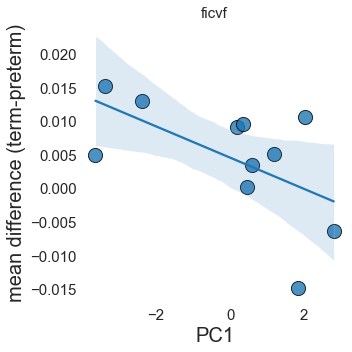

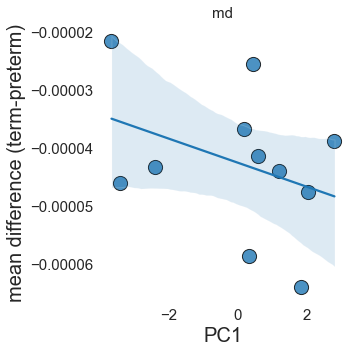

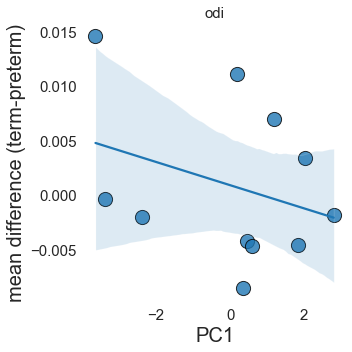

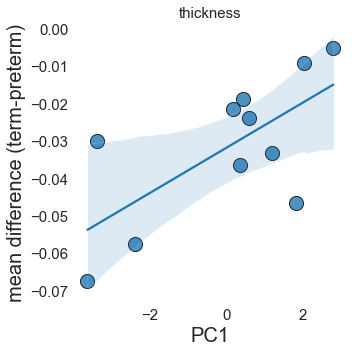

In [29]:
# Figure S10
out_data = pd.read_csv('../data/processed_imaging/term-vs-preterm-cortical-metrics-corrected-for-age-and-sex.csv')
pca_data = pd.read_csv('../results/PCA/mean-regional-principal-components.csv')

metrics = ['fa', 'ficvf', 'md', 'odi', 'thickness']
for metric in metrics:

    fig, ax =plt.subplots(1,1, figsize=(5,5), sharey=True)

    # set up
    plot_data = out_data.loc[out_data['metric']==metric,:]
    group_dict={0:'preterm',1:'term'}
    plot_data.loc[:,'group'] = plot_data['term'].map(group_dict)

    # relationship between PC1 and mean group differences in metrics
    group_differences =  pd.DataFrame((plot_data[plot_data['term']==1].groupby(['region','metric']).mean()['value'] - plot_data[plot_data['term']==0].groupby(['region','metric']).mean()['value']))
    group_differences.reset_index(inplace=True)

    # PCA data
    pca_dict = dict(zip(pca_data['region'], pca_data['PC1']))
    group_differences['PC1'] = group_differences['region'].map(pca_dict)

    # REGRESSION PLOT
    sns.regplot('PC1', 'value', data=group_differences, truncate=True, ax=ax, scatter_kws={'s':200, 'edgecolor':'black'})

    ax.set_ylabel('mean difference (term-preterm)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel('PC1', fontsize=20)
    ax.set_title(metric, fontsize=15)

    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig('Supplemental_Figures/Figure_S10_{:}.png'.format(metric))
